# **TEXT PREPROCESSING**

In real world we wont get clean data at most of the times but to create a model we need clean data. By means of unclean data it will have unnecessary elements such as punctuations, stop words, numbers, casings etc... Suppose we need to build a sentiment analysis model for a movie review and if we get a unclean raw text data we should clean it by removing those unnecessary elements. We need to clean this data so that we can feed it as input to our model.

# FILE MANIPULATION

### OPENING, READING AND CLOSING A TEXT FILE


There are various ways to open a text file in Python. One of the most common way is to use the open() function. To open a text file we need to specify the file path and the mode of opening.
Once the file is opened we can read the data from the file using the read() function. After reading the data we need to close the file using the close() function.

In [1]:
txt_file_rd = open("./res/03_text_preprocessing.txt", "r")
txt_file_rd_content = txt_file_rd.read()
txt_file_rd.close()
print(txt_file_rd_content)

This is a Test File, for Text Preprocessing.


### WRITING DATA TO A TEXT FILE

There are various ways to write data to a text file in Python. One of the most common way is to use the open() function. To open a text file we need to specify the file path and the mode of opening. Once it is opened we can write data to the file using the write() function. After writing the data we need to close the file using the close() function.

In [2]:
txt_file_wr = open("./res/03_text_preprocessing.txt", "w")
txt_file_wr.write("This is a Test File, for Text Preprocessing.")
txt_file_wr.close()

In [3]:
txt_file_rd = open("./res/03_text_preprocessing.txt", "r")
txt_file_rd_content = txt_file_rd.read()
txt_file_rd.close()
print(txt_file_rd_content)

This is a Test File, for Text Preprocessing.


# TEXT CLEANING USING REGEX AND NLTK

Now that we have opened the file and read the data we need to know how to clean the data. For this specific cleaning task we will harness the power of regex and NLTK(Natural Language Toolkit). In this preprocessing steps mainly depends on the problem domain and the problem itself. Based on the problem statement the cleaning steps will be different. Every step will not be needed in every problem. 

## REGEX FUNCTIONS

In Python section we have discussed about the different regex functions. Now we will use that knowledge to clean our data. Some of the regex functions are: sub, findall, etc..

<figure>
<img src= "./res\03_1_Regex_reference_table.png" style="width:100%">
<a href = "https://python.plainenglish.io/better-text-preprocessing-w-regex-774d27ee0e6d"> <figcaption align = "center"><b>Fig.1 -  Regex</b></figcaption></a>
</figure>

In [4]:
### Importing the necessary libraries
import nltk
import string
import re

### TEXT TO LOWERCASE

It is important to lowercase the text. This is because the model will be trained on lowercase text. And this case difference will cause the vectorization and tokenization process more difficult by making the model more sensitive to the case and also consuming more memory.

In [5]:
### Lowercasing the text
def lowercase_text(text): 
    return text.lower() 

lowercase_text_input_str = "Ineuron is an Education Platform for the Future of Education. They have a mission to make education accessible to everyone."
lowercase_text(lowercase_text_input_str) 

'ineuron is an education platform for the future of education. they have a mission to make education accessible to everyone.'

### REMOVING PUNCTUATION

Punctuations needed to be removed because if there is a punctuation is there with a word such as iNeuron - iNeuron! then here iNeuron and iNeuron! will be treated as two different words. But if we remove the punctuation then it will be treated as one word. So we need to remove the punctuation.

In [6]:
## Removing Punctuation using the regex function
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)

remove_punctuation_input_str = "Ineuron is an Education Platform for the 'Future of Education'. They have a mission to make education accessible to everyone.!"
remove_punctuation(remove_punctuation_input_str)

'Ineuron is an Education Platform for the Future of Education They have a mission to make education accessible to everyone'

## REMOVE STOP WORDS

Stop words are words which are not required to be considered in the model because they do not  contribute any meaning to the context of the sentence. It can be removed by using NLTK which has a corpus of set of stop words and if any specific word is there in the list from our sentence that can be removed. For example, the word "the" is not required to be considered in the model. So we need to remove the stop words.

In [7]:
# importing nltk library 
from nltk.corpus import stopwords # set of stopwords
from nltk.tokenize import word_tokenize # tokenization function which will be discussed in sometime

# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

remove_stopwords_input_str = "Ineuron is an Education Platform for the 'Future of Education'. They have a mission to make education accessible to everyone.!"
remove_stopwords(remove_stopwords_input_str)

['Ineuron',
 'Education',
 'Platform',
 "'Future",
 'Education',
 "'",
 '.',
 'They',
 'mission',
 'make',
 'education',
 'accessible',
 'everyone',
 '.',
 '!']

## PLAYING WITH NUMBERS

There are two ways to preprocess the numbers where one is to remove the numbers and the other is to replace the numbers with its equivalent word representation such as one, two, three etc.

### REMOVING NUMBERS

We can remove the numbers present in the text using the regex function sub() by matching the numbers with the regex pattern **\d+**.

In [8]:
### Removing numbers 
def remove_num(text): 
    result = re.sub(r'\d+', '', text) 
    return result 

remove_num_input_str = "There are 100 shops in this street of which 5 are mine and 18 are my friends'."
remove_num(remove_num_input_str) 

"There are  shops in this street of which  are mine and  are my friends'."

### REPLACING NUMBING WITH WORDS

For replacing the numbers with the equivalent words we will use the inflect module.

In [9]:
# import the library 
import inflect 
q = inflect.engine() 

# convert number into text 
def convert_num(text): 
    # split strings into list of texts 
    temp_string = text.split() 
    # initialise empty list 
    new_str = [] 
    for word in temp_string: 
        # if text is a digit, convert the digit 
        # to numbers and append into the new_str list 
        if word.isdigit(): 
            temp = q.number_to_words(word) 
            new_str.append(temp) 
        # append the texts as it is 
        else: 
            new_str.append(word) 
    # join the texts of new_str to form a string 
    temp_str = ' '.join(new_str) 
    return temp_str 
convert_num_input_str = "There are 100 shops in this street of which 5 are mine and 18 are my friends'."
convert_num(convert_num_input_str)

"There are one hundred shops in this street of which five are mine and eighteen are my friends'."

# TOKENIZATION USING NLTK AND SPACY

## Tokenization

Tokenization is the process of breaking the text into smaller enitites such as words, subwords or characters. For example, if we have a sentence "I am a student" then the tokenization will be I, am, a, student. This tokenization returns a list of tokens which will be used as input to the model after vectorizing it

##  Tokenization using NLTK

The word_tokenize function of NLTK takes a string as input and returns a list of tokens. Here the splitting happens considering the space as the delimiter. There are some other tokenizers such as WordPunctTokenizer, PunktSentenceTokenizer, TreebankWordTokenizer etc. WhitespaceTokenizer is similar word_tokenize function of NLTK which considers the space, tab, newline etc. as the delimiter.

In [10]:
# word_tokenize function of nltk library

from nltk.tokenize import word_tokenize
def tokenize_text_word_tokenize(text):
    return word_tokenize(text)

In [11]:
# WordPunctTokenizer class of nltk library
from nltk.tokenize.regexp import WordPunctTokenizer
def tokenize_text_wordpunct(text):
    return WordPunctTokenizer().tokenize(text)

In [12]:
# PunktSentenceTokenizer class of nltk library
from nltk.tokenize import PunktSentenceTokenizer
def tokenize_text_punkt(text):
    return PunktSentenceTokenizer().tokenize(text)

In [13]:
# TreebankWordTokenizer class of nltk library
from nltk.tokenize import TreebankWordTokenizer
def tokenize_text_treebank(text):
    return TreebankWordTokenizer().tokenize(text)

In [14]:
tokenize_input_str = "Ineuron is an Education Platform for the 'Future of Education'. They have a mission to make education accessible to everyone.!"
tokenize_text_word_tokenize(tokenize_input_str)

['Ineuron',
 'is',
 'an',
 'Education',
 'Platform',
 'for',
 'the',
 "'Future",
 'of',
 'Education',
 "'",
 '.',
 'They',
 'have',
 'a',
 'mission',
 'to',
 'make',
 'education',
 'accessible',
 'to',
 'everyone',
 '.',
 '!']

In [15]:
tokenize_input_str = "Ineuron is an Education Platform for the 'Future of Education'. They have a mission to make education accessible to everyone.!"
tokenize_text_wordpunct(tokenize_input_str)

['Ineuron',
 'is',
 'an',
 'Education',
 'Platform',
 'for',
 'the',
 "'",
 'Future',
 'of',
 'Education',
 "'.",
 'They',
 'have',
 'a',
 'mission',
 'to',
 'make',
 'education',
 'accessible',
 'to',
 'everyone',
 '.!']

In [16]:
tokenize_input_str = "Ineuron is an Education Platform for the 'Future of Education'. They have a mission to make education accessible to everyone.!"
tokenize_text_punkt(tokenize_input_str)

["Ineuron is an Education Platform for the 'Future of Education'.",
 'They have a mission to make education accessible to everyone.',
 '!']

In [17]:
tokenize_input_str = "Ineuron is an Education Platform for the 'Future of Education'. They have a mission to make education accessible to everyone.!"
tokenize_text_treebank(tokenize_input_str)

['Ineuron',
 'is',
 'an',
 'Education',
 'Platform',
 'for',
 'the',
 "'Future",
 'of',
 "Education'.",
 'They',
 'have',
 'a',
 'mission',
 'to',
 'make',
 'education',
 'accessible',
 'to',
 'everyone.',
 '!']

## Tokenization using Spacy

In [18]:
# Construction 1
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)
tokens = tokenizer("Ineuron is an Education Platform that's for the 'Future of Education'. They have a mission to make education accessible to everyone.!")
for token in tokens:
    print(token,end=', ')

Ineuron, is, an, Education, Platform, that's, for, the, 'Future, of, Education'., They, have, a, mission, to, make, education, accessible, to, everyone.!, 

In [19]:
# Construction 2
from spacy.lang.en import English
nlp = English()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer2 = nlp.tokenizer
tokens = tokenizer2("Ineuron is an Education Platform that's for the 'Future of Education'. They have a mission to make education accessible to everyone.!")
for token in tokens:
    print(token,end=', ')

Ineuron, is, an, Education, Platform, that, 's, for, the, ', Future, of, Education, ', ., They, have, a, mission, to, make, education, accessible, to, everyone, ., !, 

# STEMMING USING NLTK AND SPACY

## Stemming

From Stemming we will process of getting the root form of a word. Root or Stem is the part to which inflextional affixes(like -ed, -ize, etc) are added. We would create the stem words by removing the prefix of suffix of a word. So, stemming a word may not result in actual words.

For Example: Mangoes ---> Mango

             Boys ---> Boy
             
             going ---> go

## Stemming using NLTK

If our sentences are not in tokens, then we need to convert it into tokens. After we converted strings of text into tokens, then we can convert those word tokens into their root form. These are the Porter stemmer, the snowball stemmer, and the Lancaster Stemmer. Out of these SnowballStemmer is the best choice.

In [20]:
# nltk's porter stemmer 
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
stem1 = PorterStemmer() 

# stem words in the list of tokenised words 
def porter_stem_words(text): 
    word_tokens = word_tokenize(text) 
    stems = [stem1.stem(word) for word in word_tokens] 
    return stems 

porter_stem_text = "Ineuron is an Education Platform that's for the 'Future of Education'. They have a mission to make education accessible fairly to everyone.!"
porter_stem_words(porter_stem_text)

['ineuron',
 'is',
 'an',
 'educ',
 'platform',
 'that',
 "'s",
 'for',
 'the',
 "'futur",
 'of',
 'educ',
 "'",
 '.',
 'they',
 'have',
 'a',
 'mission',
 'to',
 'make',
 'educ',
 'access',
 'fairli',
 'to',
 'everyon',
 '.',
 '!']

In [21]:
# nltk's Lancaster Stemmer
from nltk.stem.lancaster import LancasterStemmer
stem2 = LancasterStemmer()

def lanc_stem_words(text): 
    word_tokens = word_tokenize(text) 
    stems = [stem2.stem(word) for word in word_tokens] 
    return stems

lanc_stem_text = "Ineuron is an Education Platform that's for the 'Future of Education'. They have a mission to make education accessible fairly everyone.!"
lanc_stem_words(lanc_stem_text)

['ineuron',
 'is',
 'an',
 'educ',
 'platform',
 'that',
 "'s",
 'for',
 'the',
 "'future",
 'of',
 'educ',
 "'",
 '.',
 'they',
 'hav',
 'a',
 'miss',
 'to',
 'mak',
 'educ',
 'access',
 'fair',
 'everyon',
 '.',
 '!']

In [22]:
# nltk's SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
stem3 = SnowballStemmer("english")

def snowball_stem_words(text):
    word_tokens = word_tokenize(text) 
    stems = [stem3.stem(word) for word in word_tokens] 
    return stems

snow_stem_text = "Ineuron is an Education Platform that's for the 'Future of Education'. They have a mission to make education accessible fairly to everyone.!"
snowball_stem_words(snow_stem_text)

['ineuron',
 'is',
 'an',
 'educ',
 'platform',
 'that',
 "'s",
 'for',
 'the',
 'futur',
 'of',
 'educ',
 "'",
 '.',
 'they',
 'have',
 'a',
 'mission',
 'to',
 'make',
 'educ',
 'access',
 'fair',
 'to',
 'everyon',
 '.',
 '!']

Here it is visible that in Porter Stemmer it stemmed fairly to fairli but SnowballStemmer stemmed to fair. Snowball Stemmer is slightly more aggrresive than Porter Stemmer and Lancaster Stemmer.

## Stemming using Spacy

There is no stemming in Spacy.

# LEMMATIZATION USING NLTK AND SPACY

## Lemmatization

A lemma is the base form of a token. The lemma of writing, wrote is write. Lemmatization is the process of reducing the words to their base form or lemmas. As stemming, lemmatization do the same but the only difference is that lemmatization ensures that root word belongs to the language. Because of the use of lemmatization we will get the valid words. 

## Lemmatization using NLTK

In NLTK(Natural language Toolkit), we use WordLemmatizer to get the lemmas of words. We also need to provide a context for the lemmatization.So, we added pos(parts-of-speech) as a parameter. 

In [23]:
from nltk.stem import wordnet 
from nltk.tokenize import word_tokenize 
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech(pos)
    lemmas = [lemma.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 

text = "Ineuron is an Education Platform that's for the 'Future of Education'. They have a mission to make education accessible fairly to everyone.!"
lemmatize_word(text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Ineuron',
 'be',
 'an',
 'Education',
 'Platform',
 'that',
 "'s",
 'for',
 'the',
 "'Future",
 'of',
 'Education',
 "'",
 '.',
 'They',
 'have',
 'a',
 'mission',
 'to',
 'make',
 'education',
 'accessible',
 'fairly',
 'to',
 'everyone',
 '.',
 '!']

Here "is" is converted to its base form "be"

## Lemmatization using Spacy

In Spacy we use .lemma_ of the token to get the lemma of the token.

In [24]:
# lemmatization using spacy
import spacy
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
doc = nlp("Ineuron is an Education Platform that's for the 'Future of Education'. They have a mission to make education accessible fairly to everyone.!")
for token in doc:
    print(token.text, token.lemma_)

Ineuron Ineuron
is be
an an
Education Education
Platform Platform
that that
's be
for for
the the
' '
Future future
of of
Education Education
' '
. .
They they
have have
a a
mission mission
to to
make make
education education
accessible accessible
fairly fairly
to to
everyone everyone
. .
! !


# WORD CLOUD

Word Cloud is a visual representation of the words in a text. It is a way to represent the words in a text in a form of a cloud where the size of the words indicates the frequency of the words. By this we can see how the words are distributed in the text.

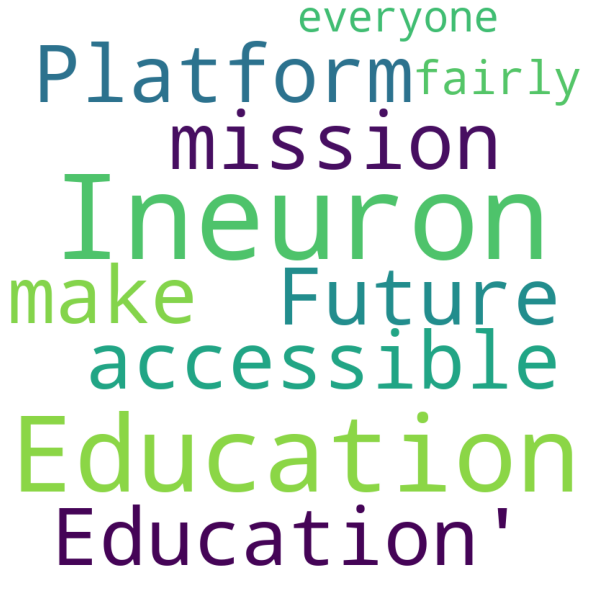

In [25]:
# wordcloud using wordcloud library
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_input_str = "Ineuron is an Education Platform that's for the 'Future of Education'. Ineuron have a mission to make education accessible fairly to everyone.!"

wprd = WordCloud(width = 800, height = 800, background_color ='white').generate(wordcloud_input_str)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wprd)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Here it is noticable that Ineuron is larger than other words because the word Ineuron is present in the text more than other words. Ineuron is present two times while others are only present once.

# PART OF SPEECH TAGGING USING NLTK AND SPACY

## POS TAGGING

Part of Speech Tagging is the process of assigning a part of speech to each word in a sentence.
Here, the part of speech is a broad term that includes the different parts of speech such as nouns, verbs, adjectives, adverbs, prepositions, conjunctions, etc...
But in NLP, the part of speech is a more specific term which is called POS tag.

<figure>
<img src= "./res/01_2_1-pos-tag-eg.jpeg" style="width:100%">
<figcaption align = "center"><b>Fig.2 - POS tagging example</b></figcaption>
</figure>

## APPLICATION OF POS TAGGING

- POS tagging is used to understand the syntactic structure of the sentence.
- It is used to understand the meaning of the sentence.
- Word Sense Disambiguation

## TYPES OF POS TAGGING

There are **2** main types of POS Tagging. They are:
- Rule Based POS Tagging
- Stochastic POS Tagging    

### RULE BASED POS TAGGING
- The rule based POS tagging is the simplest POS tagging technique. Here, the POS tag is assigned to each word based on the predefined rules. There are many rules which are used to assign the POS tag. This disambinguation is done by analyzing the linguistic features of the word, its preceding word, its following word, and other aspects.

- ***For eg:***
**If the preceding word is an article, then the word in contention for tagging must be a noun.**

- The main disadvantage of the rule based POS tagging is that it is very slow and tiring process to create the rules.

### STOCHASTIC POS TAGGING
The term "stochastic tagger" can be referred any number of different approaches to the problem of POS tagging. Any model that somehow incorporates frequency or probability in its approach of tagging the words can be saidd as stochastic.

***For eg: HMM(Hidden Markov Model)***

## POS TAGGING using NLTK

In [26]:
import nltk
text = "Hello Everyone. Welcome to Ineuron NLP. How are you?"
sentence = nltk.sent_tokenize(text)
for sent in sentence:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Hello', 'NNP'), ('Everyone', 'NNP'), ('.', '.')]
[('Welcome', 'VB'), ('to', 'TO'), ('Ineuron', 'NNP'), ('NLP', 'NNP'), ('.', '.')]
[('How', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('?', '.')]


### POS TAGS REFERENCE

| Tag | Description |
| --- | ----------- |
| CC | coordinating conjunction |
| CD | cardinal digit |
| DT | determiner |
| EX | existential there | 
| FW | foreign word |
| IN | preposition/subordinating conjunction |
| JJ | adjective |
| JJR |  adjective, comparative | 
| JJS |  adjective, superlative |
| LS | list marker |
| MD | modal |
| NN | noun, singular | 
| NNS | noun plural |
| NNP | proper noun, singular | 
| NNPS | proper noun, plural |
| PDT | predeterminer |
| POS | possessive ending | 
| PRP | personal pronoun |
| RB | adverb |
| RBR | adverb, comparative | 
| RBS | adverb, superlative |
| RP | particle |
| TO | to |
| UH | interjection |
| VB | verb, base form |
| VBD | verb, past tense |
| VBG | verb, gerund/present participle | 
| VBN | verb, past participle |
| VBP | verb, sing. present, non-3d | 
| VBZ | verb, 3rd person sing. present | 
| WDT | wh-determiner |
| WP | wh-pronoun |
| WP$ | possessive wh-pronoun |
| WRB | wh-abverb |

## POS TAGGING USING SPACY

In [27]:
# pos tagging using spacy
import spacy
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')
doc = nlp("Hello Everyone. Welcome to Ineuron NLP. How are you?")
for token in doc:
    print(token.text, token.pos_)

Hello INTJ
Everyone PRON
. PUNCT
Welcome INTJ
to ADP
Ineuron PROPN
NLP PROPN
. PUNCT
How SCONJ
are AUX
you PRON
? PUNCT


# CHUNKING USING NLTK AND SPACY

## CHUNKING

Chunking is the process of extracting phrases from the Unstructured text and give them more structure to it. We also called them shallow parsing.We can do it on top of pos tagging. It groups words into chunks mainly for noun phrases. chunking we do by using regular expression. 

## CHUNKING using NLTK

In [28]:
#importing libraries
from nltk.tokenize import word_tokenize  
from nltk import pos_tag 
  
# here we define chunking function with text and regular 
# expressions representing grammar as parameter 
def chunking(text, grammar): 
    word_tokens = word_tokenize(text) 
  
    # label words with pos 
    word_pos = pos_tag(word_tokens) 
  
    # create chunk parser using grammar 
    chunkParser = nltk.RegexpParser(grammar) 
  
    # test it on the list of word tokens with tagged pos 
    tree = chunkParser.parse(word_pos) 
      
    for subtree in tree.subtrees(): 
        print(subtree) 
sentence = 'the little red parrot is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence, grammar) 

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


## CHUNKING using SPACY

In [36]:
## chunking using spacy
import spacy
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')
doc = nlp("Hello Everyone. Welcome to Ineuron NLP. How are you?")
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_)

Ineuron NLP NLP pobj
you you nsubj


# NAME ENTITY RECOGNITION USING NLTK AND SPACY

## NER 

Named Entity Recognition is the process of identifying the entities in a text. The entities are the names of people, places, organizations, and so on. The entities are identified using the rules of grammar. Mostly the enities will be nouns such as Sudhanshu, Ineuron, etc.

<figure>
<img src= "./res/03_2_NER.png" style="width:100%">
<figcaption align = "center"><b>Fig.3 - NER example</b></figcaption>
</figure>

## NER USING NLTK

In [31]:
from nltk.tokenize import word_tokenize 
from nltk import pos_tag, ne_chunk 
nltk.download('maxent_ne_chunker')
nltk.download('words')
def ner(text): 
    # tokenize the text 
    word_tokens = word_tokenize(text) 
    # pos tagging of words 
    word_pos = pos_tag(word_tokens) 
    # tree of word entities 
    print(ne_chunk(word_pos)) 
text = "Hello Everyone. Welcome to Ineuron NLP. How are you?"
ner(text) 

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


(S
  (PERSON Hello/NNP)
  Everyone/NNP
  ./.
  Welcome/NNP
  to/TO
  (PERSON Ineuron/NNP NLP/NNP)
  ./.
  How/WRB
  are/VBP
  you/PRP
  ?/.)


[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## NER USING SPACY

In [35]:
import spacy
from spacy import displacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
doc = nlp("Hello Everyone. Welcome to Ineuron NLP. How are you?")
print([(X.text, X.label_) for X in doc.ents])
displacy.render(doc, style="ent")

[('Ineuron', 'ORG')]
